## Problem Statement

- The Dataset comprises details of different trips of logistics service such as trip_creation_time, source_center, destination_center, distance and time between them etc. The company wants to understand and process the data coming
out of data engineering pipelines.
- Exploratory Data Analysis, Hypothesis Testing and Feature Engineering done to make sense out of the raw data by generating insights help the data science team to build forecasting models on it.
- Recommendations provided to understand the areas in which retaining of customers and acquiring of customers is required and improving their end-to-end trip process.

## Importing Libraries and Loading Dataset

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# To display Max Columns
pd.set_option('display.max_columns',100)

In [51]:
# Loading Dataset
Dlvy_df = pd.read_csv('data/delhivery_data.csv')
Dlvy_df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


## Basic Metrics

In [52]:
Dlvy_df.shape

(144867, 24)

In [53]:
Dlvy_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [54]:
Dlvy_df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [55]:
Dlvy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [56]:
Dlvy_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
Dlvy_df.describe(include=object).T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


- The dataset comprises 14817 unique trip IDs, 2 route types , 1508  unique source centers , 1481 unique destination centers

In [58]:
Dlvy_df.isna().sum() # Number of Null Values in Each Column

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [59]:
Dlvy_df.isna().sum().sum() # Total Number of Null values in Entire Dataset

554

In [60]:
Dlvy_df.duplicated().sum() # Total Number of duplicate rows

0

In [61]:
'''Removing Null Values and resetting index '''

Dlvy_df = Dlvy_df.dropna(how='any')
Dlvy_df = Dlvy_df.reset_index(drop=True)
Dlvy_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144312,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144313,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144314,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [62]:
''' Converting time columns to Pandas Datetime '''

Dlvy_df['od_start_time'] = pd.to_datetime(Dlvy_df['od_start_time'])
Dlvy_df['od_end_time'] = pd.to_datetime(Dlvy_df['od_end_time'])

In [63]:
''' Grouping by Sub-Journey in the trip '''

Dlvy_df['segment_key'] = Dlvy_df['trip_uuid'] + Dlvy_df['source_center'] + Dlvy_df['destination_center']

In [64]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

    }

In [65]:
''' Groupby mini-trips, sorting by time '''

segment = Dlvy_df.groupby('segment_key').agg(create_segment_dict).reset_index()

segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [66]:
segment.shape

(26222, 21)

In [67]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  object        
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [68]:
''' Calculate time taken between od_start_time and od_end_time and keep it as a feature. '''
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [69]:
segment[segment['trip_uuid'] == 'trip-153671041653548748']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379


In [70]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

    }

In [71]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [72]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [73]:
trip[['actual_time', 'segment_actual_time']]

,actual_time,segment_actual_time
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [74]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [75]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [76]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [77]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [78]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


### Top 10 Busiest Destinations

In [79]:
''' Top 10 Busiest Destination States '''
Numoftrips_statewise = trip.groupby('destination_state').trip_uuid.count()
Top10busiest_destinationstates = Numoftrips_statewise.sort_values(ascending = False).head(10)
Top10busiest_destinationstates

destination_state
maharashtra      2561
karnataka        2294
haryana          1640
tamil nadu       1084
uttar pradesh     805
telangana         784
gujarat           734
west bengal       697
delhi             657
punjab            617
Name: trip_uuid, dtype: int64

In [80]:
''' Top 10 Busiest Destination Cities '''
Numoftrips_citywise = trip.groupby('destination_city').trip_uuid.count()
Top10busiest_destinationcities = Numoftrips_citywise.sort_values(ascending = False).head(10)
Top10busiest_destinationcities

destination_city
bengaluru     1221
mumbai         968
gurgaon        877
delhi          554
bangalore      551
hyderabad      499
bhiwandi       434
chennai        410
pune           391
chandigarh     339
Name: trip_uuid, dtype: int64

In [81]:
''' Top 10 Busiest Destination Places '''
Numoftrips_placewise = trip.groupby('destination_place').trip_uuid.count()
Top10busiest_destinationplaces = Numoftrips_placewise.sort_values(ascending = False).head(10)
Top10busiest_destinationplaces

destination_place
bilaspur    864
central     846
nelmngla    548
mankoli     434
bomsndra    346
shamshbd    339
kundli      320
mehmdpur    274
kgairprt    272
tathawde    258
Name: trip_uuid, dtype: int64

**Insights**
- Maharashtra is the busiest destination state followed by Karnataka and Haryana
- Bengaluru is the busiest destination city followed by Mumbai and Gurgaon.
- Bilaspur is the busiest destination place followed by central and nelmngla.

In [82]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [83]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,fbd,balabhgarh,dpc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirunelveli,vdkkusrt,i


### Top 10 Busiest Sources

In [84]:
''' Top 10 Busiest Source States '''
Numoftrips_statewise = trip.groupby('source_state').trip_uuid.count()
Top10busiest_sourcestates = Numoftrips_statewise.sort_values(ascending = False).head(10)
Top10busiest_sourcestates

source_state
maharashtra      2714
karnataka        2143
haryana          1823
tamil nadu       1039
telangana         784
uttar pradesh     760
gujarat           750
delhi             725
west bengal       665
punjab            536
Name: trip_uuid, dtype: int64

In [85]:
''' Top 10 Busiest Source Cities '''
Numoftrips_citywise = trip.groupby('source_city').trip_uuid.count()
Top10busiest_sourcecities = Numoftrips_citywise.sort_values(ascending = False).head(10)
Top10busiest_sourcecities

source_city
bengaluru     1131
gurgaon       1128
bhiwandi       697
mumbai         667
bangalore      648
delhi          548
hyderabad      515
pune           514
chennai        338
mumbai hub     300
Name: trip_uuid, dtype: int64

In [86]:
''' Top 10 Busiest Source Places '''
Numoftrips_placewise = trip.groupby('source_place').trip_uuid.count()
Top10busiest_sourceplaces = Numoftrips_placewise.sort_values(ascending = False).head(10)
Top10busiest_sourceplaces

source_place
bilaspur    1074
central      886
mankoli      697
nelmngla     625
bomsndra     457
tathawde     396
mumbai       326
kgairprt     295
shamshbd     278
dankuni      245
Name: trip_uuid, dtype: int64

**Insights**
- Maharashtra is the busiest source state followed by Karnataka and Haryana
- Bengaluru is the busiest source city followed by Gurgaon and Bhiwandi.
- Bilaspur is the busiest source place followed by central and mankoli.

### Top 10 Busiest Routes

In [87]:
Numoftrips_routewise = trip.groupby(['source_city','destination_city']).trip_uuid.count()
Top10busiest_routes = Numoftrips_routewise.sort_values(ascending = False).head(10)
Top10busiest_routes

source_city  destination_city
bengaluru    bengaluru           718
bangalore    bengaluru           477
hyderabad    hyderabad           355
mumbai       mumbai              354
bengaluru    bangalore           344
bhiwandi     mumbai              332
pune         pune                241
gurgaon      delhi               241
mumbai hub   mumbai              227
chennai      chennai             223
Name: trip_uuid, dtype: int64

- Bengaluru to Bengaluru is the busiest route

In [88]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [89]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [90]:
trip['trip_month'].value_counts()

trip_month
9     13011
10     1776
Name: count, dtype: int64

In [91]:
trip['trip_day'].value_counts()

trip_day
18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712
20    703
25    695
26    683
19    674
24    658
27    650
23    631
3     627
16    616
28    605
29    605
1     600
2     549
30    506
Name: count, dtype: int64

In [92]:
trip['trip_week'].value_counts()

trip_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: Int64

**Insights**
- September is the busiest month
- Day 18 is the busiest day followed by Day 15 and Day 13
- Week 38 is the busiest week followed by Week 39 and Week 37.

### Visual Analysis

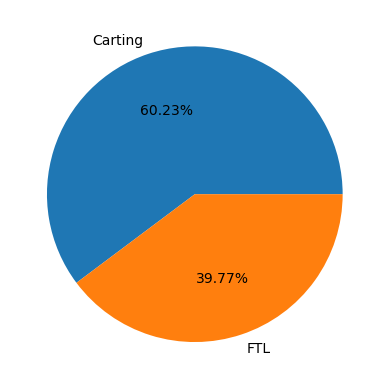

In [93]:
plt.pie(x=trip.groupby('route_type').trip_uuid.count().values,
  labels = trip.groupby('route_type').trip_uuid.count().index,
 autopct = "%.2f%%")
plt.show()

- Most common route type is carting

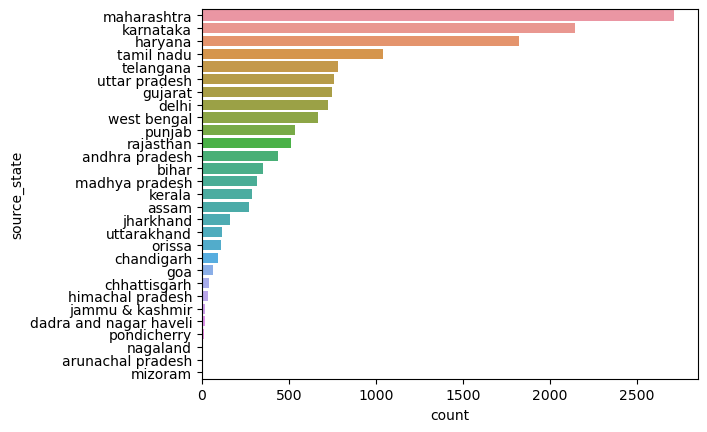

In [94]:
sns.countplot(y=trip['source_state'],order = trip['source_state'].value_counts().index)
plt.show()

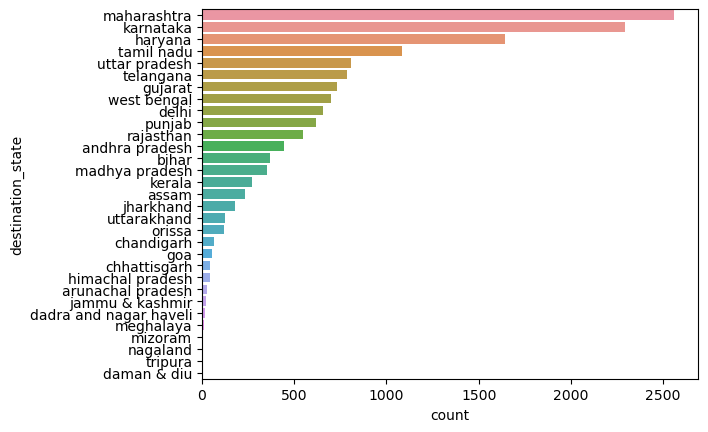

In [95]:
sns.countplot(y=trip['destination_state'],order = trip['destination_state'].value_counts().index)
plt.show()

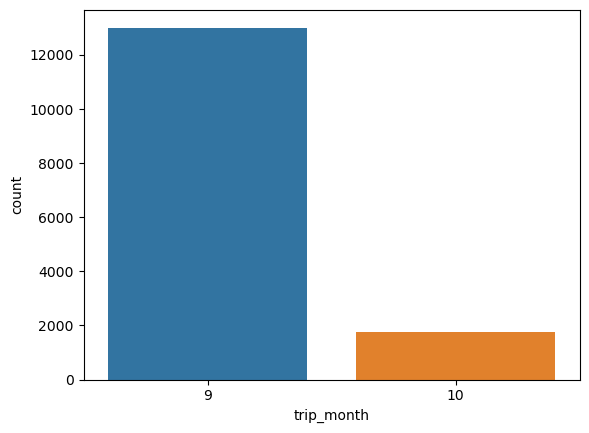

In [96]:
sns.countplot(x=trip['trip_month'])
plt.show()

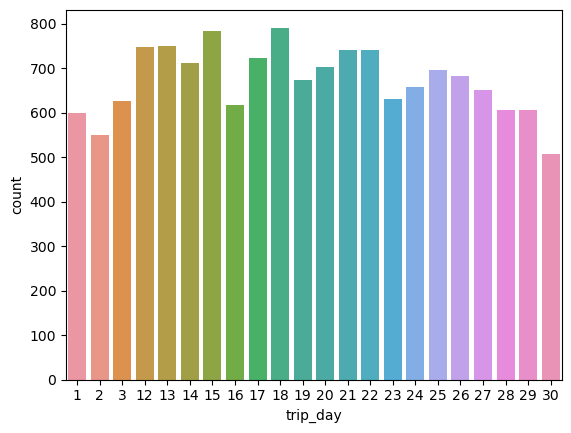

In [97]:
sns.countplot(x=trip['trip_day'])
plt.show()

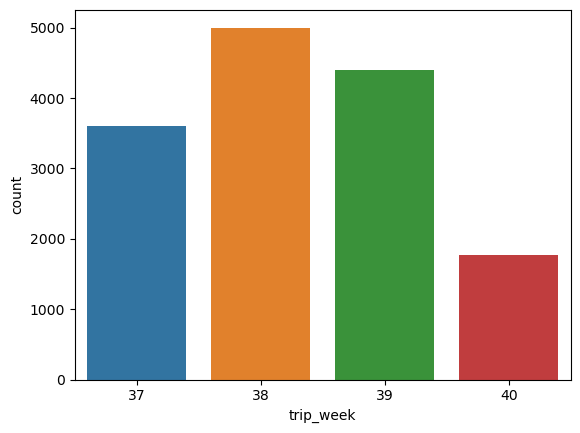

In [98]:
sns.countplot(x=trip['trip_week'])
plt.show()

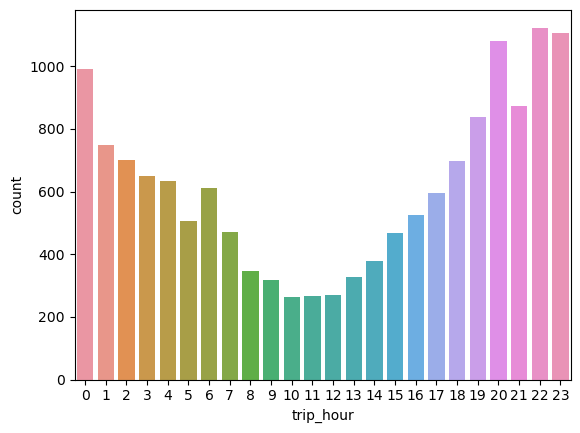

In [99]:
sns.countplot(x=trip['trip_hour'])
plt.show()

- Number of trips starts increasing after 10 a.m and becomes maximum at 11 p.m and then starts decreasing

In [102]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time', 'segment_osrm_distance',
            'segment_osrm_time', 'od_time_diff_hour']

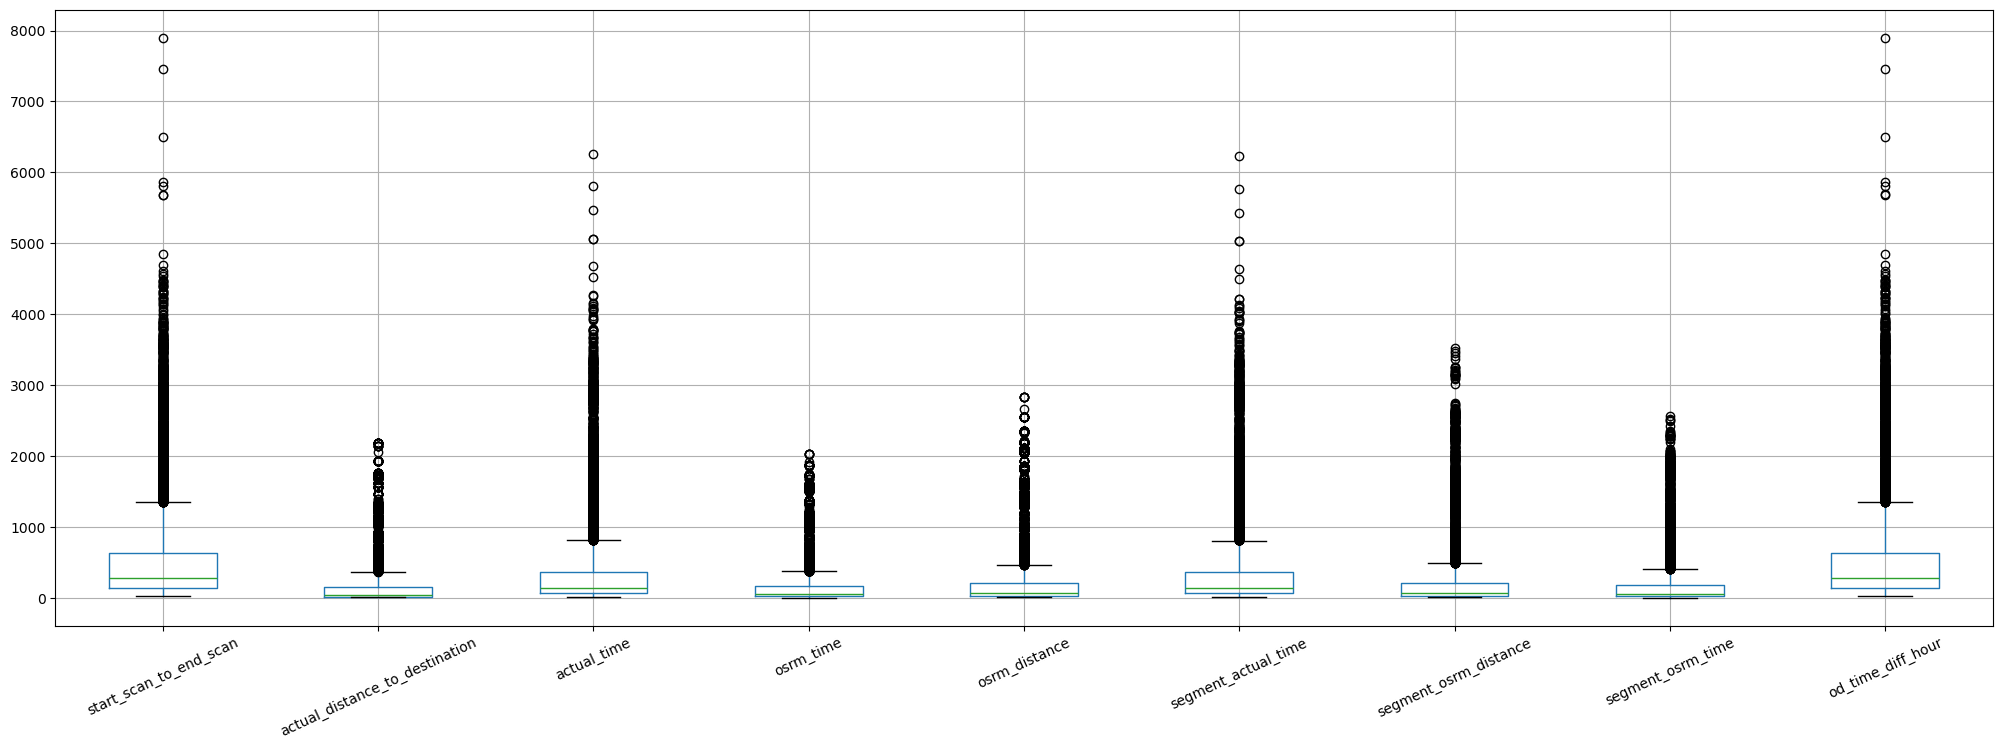

In [103]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))
plt.show()

In [104]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

Q1 - 1.5 * IQR


start_scan_to_end_scan           -575.500000
actual_distance_to_destination   -188.444140
actual_time                      -383.000000
osrm_time                        -179.500000
osrm_distance                    -233.074050
segment_actual_time              -381.000000
segment_osrm_distance            -243.393775
segment_osrm_time                -201.000000
od_time_diff_hour                -576.060306
dtype: float64

In [105]:
trip[num_cols] < (Q1 - 1.5 * IQR)

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14782,False,False,False,False,False,False,False,False,False
14783,False,False,False,False,False,False,False,False,False
14784,False,False,False,False,False,False,False,False,False
14785,False,False,False,False,False,False,False,False,False


In [106]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [107]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,tamil nadu,chennai,chennai,none,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,punjab,chandigarh,mehmdpur,h,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,haryana,faridabad,blbgarh,dc,haryana,fbd,balabhgarh,dpc,2018,10,23,3,40,2
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,uttar pradesh,kanpur,govndngr,dc,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,tamil nadu,tirchchndr,shnmgprm,d,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2


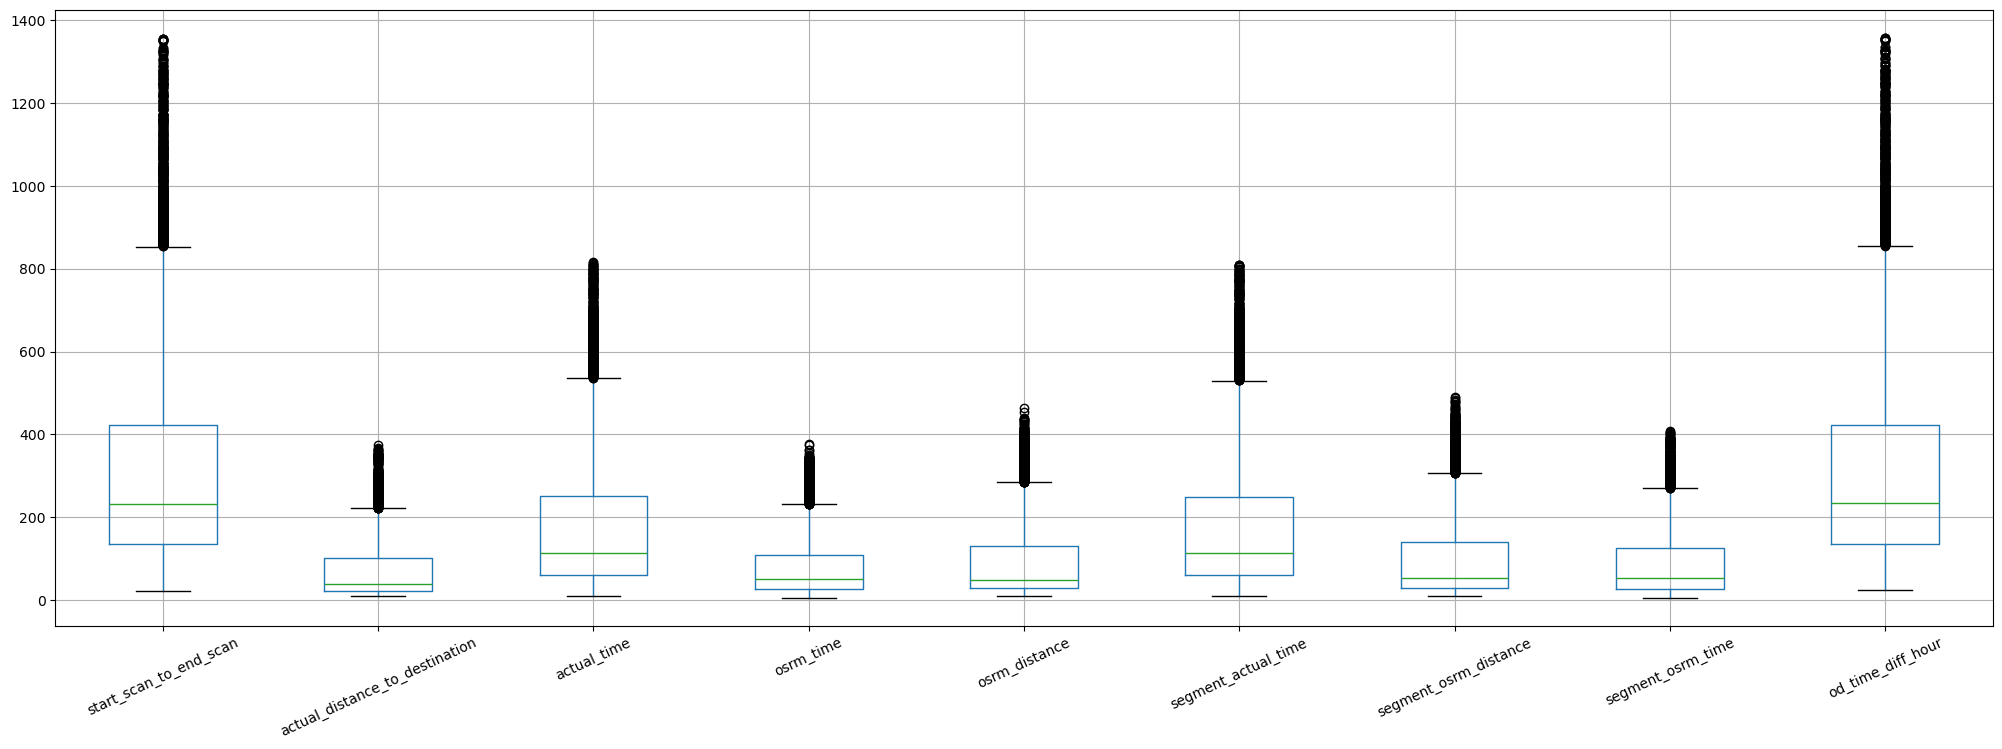

In [108]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))
plt.show()

### Hypothesis Testing

### OSRM Time vs Actual Time

In [ ]:
''' Null Hypothesis       : OSRM Time and Actual time are not significantly different.
    Alternative Hypothesis: OSRM Time and Actual time are significantly different.'''
''' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.
    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '''

' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.\n    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '

#### Check for Normal distribution

In [110]:
from scipy.stats import shapiro
shapiro(trip['osrm_time'])

ShapiroResult(statistic=0.815010035695143, pvalue=2.477998215676191e-80)

In [111]:
shapiro(trip['actual_time'])

ShapiroResult(statistic=0.8327718313797802, pvalue=4.183733752865259e-78)

#### Check for Equal variances

In [112]:
from scipy.stats import levene
levene(trip['osrm_time'],trip['actual_time'])

LeveneResult(statistic=2622.798122016967, pvalue=0.0)

- osrm_time and actual_time neither follow normal distribution nor having equal variances.Hence ttest_ind shall not be used.Mann whitney U test shall be used.

In [113]:
from scipy.stats import mannwhitneyu
test_statistic,p_value = mannwhitneyu(trip['osrm_time'],trip['actual_time'])
# Set significance level alpha
alpha  = 0.05
# Testing the Null Hypothesis
print(f'p_value : {p_value}')
if p_value > alpha:
    print('OSRM Time and Actual time are not significantly different')
elif p_value < alpha:
    print('OSRM Time and Actual time are significantly different')

p_value : 0.0
OSRM Time and Actual time are significantly different


### Actual Time vs Segment Actual Time

In [114]:
''' Null Hypothesis       : Actual Time and Segment Actual time are not significantly different.
    Alternative Hypothesis: Actual Time and Segment Actual time are significantly different.'''
''' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.
    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '''

' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.\n    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '

#### Check for Normal distribution

In [115]:
from scipy.stats import shapiro
shapiro(trip['actual_time'])

ShapiroResult(statistic=0.8327718313797802, pvalue=4.183733752865259e-78)

In [117]:
shapiro(trip['segment_actual_time'])

ShapiroResult(statistic=0.8318532623167776, pvalue=3.173272292217357e-78)

#### Check for Equal variances

In [119]:
from scipy.stats import levene
levene(trip['actual_time'],trip['segment_actual_time'])

LeveneResult(statistic=0.30797337672704056, pvalue=0.5789313514146436)

- osrm_time and actual_time not  follow normal distribution and having equal variances.
Hence ttest_ind shall not be used.Mann whitney U test shall be used.`

In [120]:
from scipy.stats import mannwhitneyu
test_statistic,p_value = mannwhitneyu(trip['actual_time'],trip['segment_actual_time'])
# Set significance level alpha
alpha  = 0.05
# Testing the Null Hypothesis
print(f'p_value : {p_value}')
if p_value > alpha:
    print('Actual time and Segment Actual Time are not significantly different')
elif p_value < alpha:
    print('Actual Time and Segment Actual time are significantly different')

p_value : 0.3342240274629089
Actual time and Segment Actual Time are not significantly different


#### OSRM Distance vs Segment OSRM Distance

In [121]:
''' Null Hypothesis       : OSRM Distance and Segment OSRM Distance are not significantly different.
    Alternative Hypothesis: OSRM Distance and Segment OSRM Distance are significantly different.'''
''' Since Hypthosesis testing is required between distances of two categories,2 sample test_ind shall be done.
    However,two distances shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '''

' Since Hypthosesis testing is required between distances of two categories,2 sample test_ind shall be done.\n    However,two distances shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '

#### Check for Normal distribution

In [122]:
from scipy.stats import shapiro
shapiro(trip['osrm_distance'])

ShapiroResult(statistic=0.799697518989138, pvalue=4.1366403003751665e-82)

In [124]:
shapiro(trip['segment_osrm_distance'])

ShapiroResult(statistic=0.8078112228839407, pvalue=3.4940196360395376e-81)

#### Check for Equal variances

In [126]:
from scipy.stats import levene
levene(trip['osrm_distance'],trip['segment_osrm_distance'])

LeveneResult(statistic=18.964816702075854, pvalue=1.3367122634922023e-05)

- osrm_distance and segment_osrm_distance_sum not  follow normal distribution and having equal variances.
Hence ttest_ind shall not be used.Mann whitney U test shall be used.`

In [127]:
from scipy.stats import mannwhitneyu
test_statistic,p_value = mannwhitneyu(trip['osrm_distance'],trip['segment_osrm_distance'])
# Set significance level alpha
alpha  = 0.05
# Testing the Null Hypothesis
print(f'p_value : {p_value}')
if p_value > alpha:
    print('osrm_distance and segment_osrm_distance_sum are not significantly different')
elif p_value < alpha:
    print('osrm_distance and segment_osrm_distance_sum are significantly different')

p_value : 1.8349406474411988e-08
osrm_distance and segment_osrm_distance_sum are significantly different


#### OSRM Time vs Segment OSRM Time

In [128]:
''' Null Hypothesis       : OSRM Time and Segment OSRM Time are not significantly different.
    Alternative Hypothesis: OSRM Time and Segment OSRM Time are significantly different.'''
''' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.
    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '''

' Since Hypthosesis testing is required between times of two categories,2 sample test_ind shall be done.\n    However,two times shall be checked for normal distribution and equal variances prior to carrying 2 sample ttest_ind '

In [129]:
#### Check for Normal distribution

In [130]:
from scipy.stats import shapiro
shapiro(trip['osrm_time'])

ShapiroResult(statistic=0.815010035695143, pvalue=2.477998215676191e-80)

In [132]:
shapiro(trip['segment_osrm_time'])

ShapiroResult(statistic=0.8225620961805734, pvalue=2.0784557588131095e-79)

#### Check for Equal variances

In [136]:
from scipy.stats import levene
levene(trip['osrm_time'],trip['segment_osrm_time'])

LeveneResult(statistic=55.96223806557732, pvalue=7.626468531818714e-14)

- osrm_time and segment_osrm_time_sum not  follow normal distribution eventhough having equal variances.
Hence ttest_ind shall not be used.Mann whitney U test shall be used.`

In [137]:
from scipy.stats import mannwhitneyu
test_statistic,p_value = mannwhitneyu(trip['osrm_time'],trip['segment_osrm_time'])
# Set significance level alpha
alpha  = 0.05
# Testing the Null Hypothesis
print(f'p_value : {p_value}')
if p_value > alpha:
    print('osrm_time and segment_osrm_time_sum are not significantly different')
elif p_value < alpha:
    print('osrm_time and segment_osrm_time_sum are significantly different')

p_value : 3.7243838320849166e-10
osrm_time and segment_osrm_time_sum are significantly different


## Recommendations

- OSRM time detection shall be improved as there is significant difference
between OSRM time and the actual time. Improvisation helps customers in accurately predicting their order delivery.
- From observation of start_scan_to_end_scan and od_time_diff_hour , it can be concluded  that both are similar. However, they are having more number of outliers. The segregation shall be done based on different regions to reduce outliers. Also the segregation will aid in predicting more accurate expected trip start_to_end time difference based on region.
- Most of the orders are coming from and reaching to Maharashtra, Karnataka, Haryana and Tamil Nadu. The feedback of the customers shall be sought to further enhance delivery experience to retain the customers.
- Underperforming states in trips shall be assessed the market requirements and factors resulting in few numbers of trips to enhance the number of trips.
- Most orders taken in the middle of month. Hence, smooth delivery shall be ensured in this period and starting and ending of month trips shall be enhanced by giving month start and end offers.
- Significant difference was observed between osrm distance and segement osrm diatance.The gap shall be reduced by studying affecting factors and ensuring smoother delivery.
- Customer profiling shall be done in states, cities, places having most number of orders to provide more personalized recommendations which enhance orders frequency.
- Most orders have been observed after mid-day and maximum at around 11 p.m. Hence,the remote areas shall be checked for availability of means of delivery in late night hours to ensure delivery without fail.